In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dataset/covid19_Confirmed_dataset.csv
/kaggle/input/dataset/worldwide_happiness_report.csv


In [3]:
covid_data = pd.read_csv('../input/dataset/covid19_Confirmed_dataset.csv')
covid_data.shape

(266, 104)

In [4]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [5]:
countries = list(covid_data['Country/Region'].unique())
print("Number of Countries: ", len(countries))

Number of Countries:  187


In [6]:
covid_data.drop(['Lat', 'Long'], axis=1, inplace=True)
covid_data.shape

(266, 102)

In [7]:
covid_data_agg = covid_data.groupby('Country/Region').sum()
print(covid_data_agg.shape)

(187, 100)


In [8]:
covid_data_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


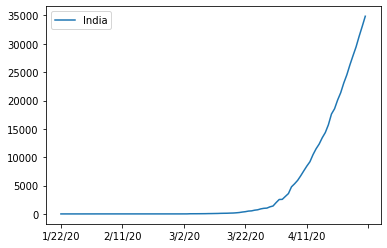

In [9]:

covid_data_agg.loc['India'].plot()
plt.legend()

<AxesSubplot:>

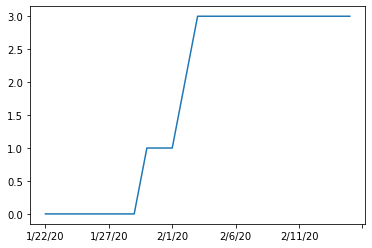

In [10]:
n = 25
covid_data_agg.loc['India'][:n].plot()


<AxesSubplot:>

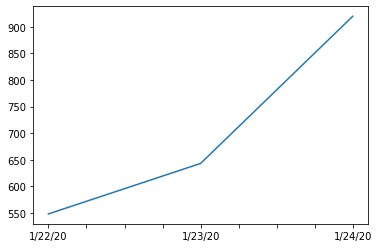

In [11]:
n = 3
covid_data_agg.loc['China'][:n].plot()


<AxesSubplot:>

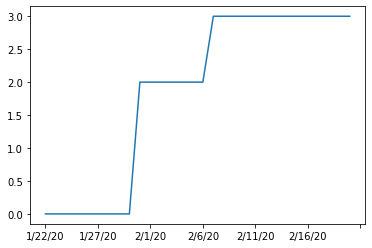

In [12]:
n = 30
covid_data_agg.loc['Italy'][:n].plot()


<AxesSubplot:>

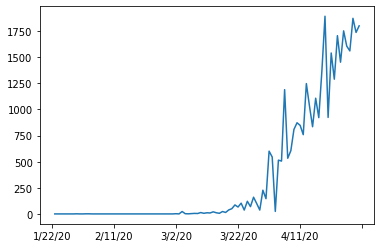

In [13]:
covid_data_agg.loc['India'].diff().plot()

<AxesSubplot:>

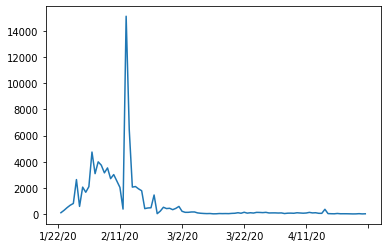

In [14]:
covid_data_agg.loc['China'].diff().plot()

<AxesSubplot:>

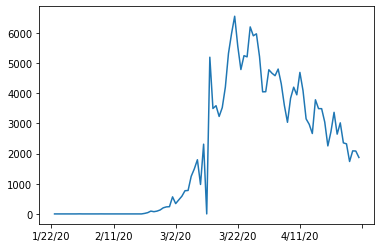

In [15]:
covid_data_agg.loc['Italy'].diff().plot()

In [16]:
max_inc = covid_data_agg.loc['India'].diff().max()
min_inc = covid_data_agg.loc['India'].diff().min()

print("Maximum Increase in a day:", max_inc)
print("Minimum Increase in a day: ", min_inc)

Maximum Increase in a day: 1893.0
Minimum Increase in a day:  0.0


In [17]:
max_infections = []
for c in countries: 
    max_infections.append(covid_data_agg.loc[c].diff().max())

# Add to the data
covid_data_agg['max_infection_rate'] = max_infections

In [18]:
df = pd.DataFrame(covid_data_agg['max_infection_rate'])
df.head()

,max_infection_rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


In [19]:
happiness_data = pd.read_csv('../input/dataset/worldwide_happiness_report.csv')
happiness_data.shape

(156, 9)

In [20]:
happiness_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [21]:
useless_cols = ['Overall rank', 'Score', 'Generosity', 'Perceptions of corruption']

# Drop the useless cols 
happiness_data.drop(useless_cols, inplace=True, axis=1)
happiness_data.shape

(156, 5)

In [22]:
happiness_data.set_index('Country or region', inplace=True)

In [23]:
data = df.join(happiness_data, how='inner')
data.head()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,232.0,0.350,0.517,0.361,0.000
Albania,34.0,0.947,0.848,0.874,0.383
Algeria,199.0,1.002,1.160,0.785,0.086
Argentina,291.0,1.092,1.432,0.881,0.471
Armenia,134.0,0.850,1.055,0.815,0.283


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='GDP per capita', ylabel='max_infection_rate'>

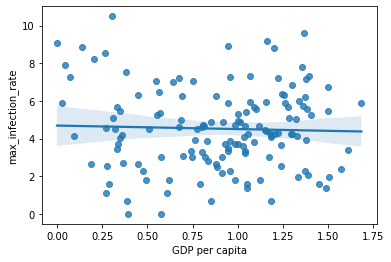

In [24]:
x = data['GDP per capita']
y = data['max_infection_rate']
sns.regplot(x, np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Social support', ylabel='max_infection_rate'>

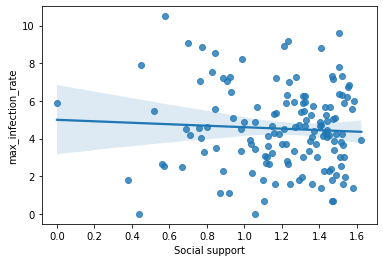

In [25]:
x = data['Social support']
y = data['max_infection_rate']
sns.regplot(x, np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Healthy life expectancy', ylabel='max_infection_rate'>

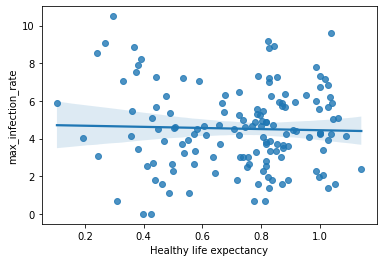

In [26]:
x = data['Healthy life expectancy']
y = data['max_infection_rate']
sns.regplot(x, np.log(y))

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Freedom to make life choices', ylabel='max_infection_rate'>

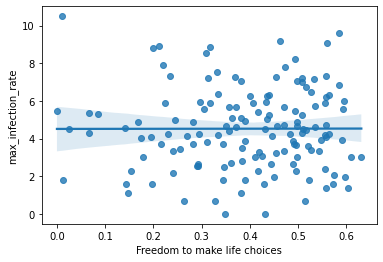

In [27]:
x = data['Freedom to make life choices']
y = data['max_infection_rate']
sns.regplot(x, np.log(y))

In [28]:
data.corr()

,max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,-0.139348,-0.177291,-0.161248,-0.155545
GDP per capita,-0.139348,1.000000,0.759468,0.863062,0.394603
Social support,-0.177291,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,-0.161248,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,-0.155545,0.394603,0.456246,0.427892,1.000000


<AxesSubplot:>

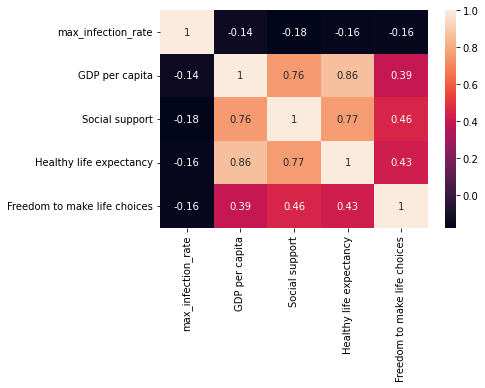

In [29]:
sns.heatmap(data.corr(), annot=True)